In [4]:
from sklearn.datasets import fetch_openml

In [5]:
mnist = fetch_openml('mnist_784', version=1)

In [6]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [7]:
mnist['data']

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [8]:
X,y  = mnist.data, mnist.target

In [9]:
X.shape

(70000, 784)

In [10]:
y.shape

(70000,)

In [11]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [12]:
some_digit = X[0]
some_digit_image = some_digit.reshape(28,28)

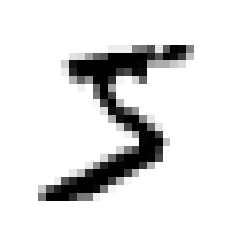

In [13]:
plt.imshow(some_digit_image, cmap='binary')
plt.axis('off')
plt.show()

In [14]:
y[0]

'5'

In [15]:
#convert y labels from strings to integer
import numpy as np
y = y.astype(np.uint8)

In [16]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[:60000]

## Training a Binary Classifier

Classifying 5 and not-5

____________________

In [17]:
y_train_5 = (y_train ==5)
y_test_5 = (y_test == 5)

Using Stochastic Gradient Descent Classifier

__________________________________________

In [18]:
from sklearn.linear_model import SGDClassifier

In [19]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [20]:
sgd_clf.predict([some_digit])

array([ True])

Cross Validating SGDclassifier

______________________________

In [21]:
from sklearn.model_selection import cross_val_score

In [22]:
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [23]:
# Sgdclassifier gives 95-96% accuracy, 
# trying a classifier that always predicts not-5

In [24]:
from sklearn.base import BaseEstimator

In [25]:
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        return self
    def predict(self,X):
        return np.zeros((len(X), 1), dtype=bool)

In [26]:
never5_clf = Never5Classifier()

In [27]:
cross_val_score(never5_clf, X_train, y_train_5, cv=3, scoring='accuracy' )

array([0.91125, 0.90855, 0.90915])

In [28]:
from sklearn.model_selection import cross_val_predict

In [29]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [30]:
from sklearn.metrics import confusion_matrix

In [31]:
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

In [32]:
from sklearn.metrics import precision_score, recall_score

In [33]:
precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [34]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

In [35]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7325171197343846

### Precision/Recall Tradeoff

______________________________

In [36]:
y_scores = sgd_clf.decision_function([some_digit])

In [37]:
y_scores

array([2164.22030239])

In [38]:
threshold= 0

In [39]:
y_some_digit_pred = (y_scores> threshold)

In [40]:
y_some_digit_pred

array([ True])

In [41]:
threshold = 8000

In [42]:
y_some_digit_pred = (y_scores> threshold)

In [43]:
y_some_digit_pred

array([False])

In [44]:
## increasing threshold value increases precision but decreases Recall
## decreasing threshold value increases Recall but decreases Precision

How to decide threshold ? 

Use "decision_function" for method parameter in cross_val_predict()

In [45]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, 
                            method='decision_function')

In [46]:
from sklearn.metrics import precision_recall_curve

In [47]:
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [48]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b-", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recalls")
    plt.legend(loc='center right')
    plt.grid()
    plt.axis()
    
    

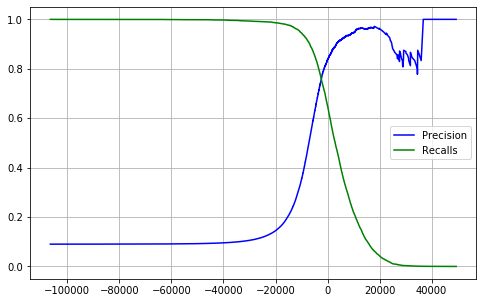

In [49]:
%matplotlib inline
plt.figure(figsize=(8,5))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

model with at least 90% precision

In [50]:
threshold_90_precision = thresholds[np.argmax(precisions>=0.9)]

In [51]:
y_precision_90 = (y_scores>= threshold_90_precision)

In [52]:
from sklearn.metrics import precision_score, recall_score

In [53]:
precision_score(y_train_5, y_precision_90)

0.9000345901072293

In [54]:
recall_score(y_train_5, y_precision_90)

0.4799852425751706

## ROC curve

Receiver Operating characteristics curve.

plots true positive rate(tpr)(another name for recall) vs false positive rate(fpr).

fpr is equal to 1 - TNR(also called as specificity). __[fpr = 1 - tnr   ]

thus, ROC plots recall(sensitivity) vs (1-specificity).

In [55]:
from sklearn.metrics import roc_curve

In [56]:
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

In [57]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr,  tpr, linewidth=2, label=label)
    plt.plot([0,1], [0,1], 'k--')
    plt.grid()
    plt.xlabel('false positive rate')
    plt.ylabel('true positive rate')

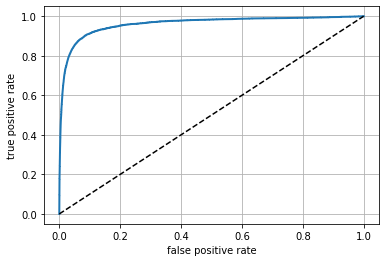

In [58]:
plot_roc_curve(fpr, tpr)
plt.show()

roc_auc_score

In [59]:
from sklearn.metrics import roc_auc_score

In [60]:
roc_auc_score(y_train_5, y_scores)

0.9604938554008616

RandomForestClassifier

In [61]:
from sklearn.ensemble import RandomForestClassifier

In [62]:
forest_clf = RandomForestClassifier(random_state=42)
y_forests_proba = cross_val_predict(forest_clf, X_train, y_train_5, method="predict_proba",
                                  cv=3)

In [63]:
y_scores_forest = y_forests_proba[:,1]

In [64]:
fpr_forest , tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

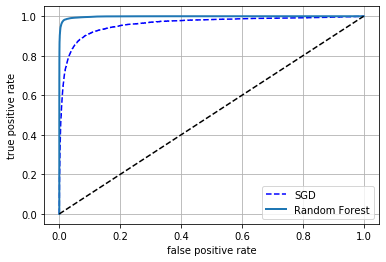

In [65]:
plt.plot(fpr, tpr, "b--", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc='lower right')
plt.show()

In [66]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

## Multiclass Classification

We can use one vs rest(ovr) strategy i.e. 10 separate classifiers for 10 different digits and then classifier output with highest proba value gets selected 

or

one vs one (OvO) strategy i.e. 0s vs 1s , 0s vs 2s , ....1s vs 2s,.....9s vs 8s etc. they make 45 different classifiers but with rather small training sets for each.

SVM classifiers scale poorly with large datasets thus OvO is better strategy while using SVM, as training lots of classifiers on small training set is faster than training few classifiers on large training sets...(in SVMs)...
for other algorithms OvR could be a better approch.

In [67]:
from sklearn.svm import SVC

In [68]:
svc_clf = SVC()

In [69]:
svc_clf.fit(X_train, y_train)

SVC()

In [70]:
svc_clf.predict([some_digit])

array([5], dtype=uint8)

Although we fed SVC the whole 10 digits and dataset simultaneously under the hood it trained 45 different classifiers!
, it used One vs One strategy.

if we use decision_function() method , it shows 10 different values , one for each class instead of just one and the class with highest value is selected... here for example above  5

In [71]:
some_digits_scores = svc_clf.decision_function([some_digit])
some_digits_scores

array([[ 1.72501977,  2.72809088,  7.2510018 ,  8.3076379 , -0.31087254,
         9.3132482 ,  1.70975103,  2.76765202,  6.23049537,  4.84771048]])

In [72]:
np.argmax(some_digits_scores)

5

In [73]:
svc_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [74]:
svc_clf.classes_[np.argmax(some_digits_scores)]

5

To force the classifier to use one particular strategy, we have OnevsRestCLassifier() or OnevsOneClassifier().
In case of SVC, we are going to force it to use OnevsRestclassifier() by creating its instance and passing the classifier SVC to its constructor.

In [75]:
from sklearn.multiclass import OneVsRestClassifier

In [76]:
ovr_clf = OneVsRestClassifier(SVC())

In [77]:
ovr_clf.fit(X_train, y_train)

OneVsRestClassifier(estimator=SVC())

In [78]:
ovr_clf.predict([some_digit])

array([5], dtype=uint8)

In [79]:
len(ovr_clf.estimators_)

10

SGD classifiers don't use OvO or OvR as they are capable of handling multiple classes.

In [80]:
sgd_clf2 = SGDClassifier(random_state=42)
sgd_clf2.fit(X_train, y_train)
sgd_clf2.predict([some_digit])

array([3], dtype=uint8)

In [81]:
sgd_clf2.decision_function([some_digit])

array([[-31893.03095419, -34419.69069632,  -9530.63950739,
          1823.73154031, -22320.14822878,  -1385.80478895,
        -26188.91070951, -16147.51323997,  -4604.35491274,
        -12050.767298  ]])

In [82]:
sgd_clf2.predict([some_digit])

array([3], dtype=uint8)

In [83]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring='accuracy' )

array([0.87365, 0.85835, 0.8689 ])

In [84]:
another_digit = X_train[8]

In [85]:
y_train[8]

1

In [131]:
sgd_clf2.predict([another_digit])

array([1], dtype=uint8)

In [132]:
sgd_clf2.decision_function([another_digit])

array([[-32955.12827569,   7060.98478268,  -5199.99581073,
         -1878.71123946,  -8349.2322124 ,  -3544.64928053,
         -5835.7751046 ,  -7075.09792929,  -1610.28820665,
         -1566.489805  ]])

In [88]:
top_20 = X_train[:20]

In [89]:
y_train[:20]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9],
      dtype=uint8)

In [133]:
sgd_clf2.predict(top_20)

array([3, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9],
      dtype=uint8)

the cross_val_score() of all 3 folds is above 85%, trying increasing accuracy by scaling values using StandardScalar()

In [91]:
from sklearn.preprocessing import StandardScaler

In [92]:
scalar_std = StandardScaler()

In [93]:
X_train_scalar  = scalar_std.fit_transform(X_train)

In [94]:
cross_val_score(sgd_clf, X_train_scalar, y_train, cv=3, scoring ='accuracy')

array([0.8983, 0.891 , 0.9018])

scaling the inputs has increased the accuracy to 90%.

### Error Analysis

In [95]:
y_train_pred = cross_val_predict(sgd_clf,X_train_scalar, y_train, cv=3)

In [96]:
conf_mx = confusion_matrix(y_train, y_train_pred)

In [97]:
conf_mx

array([[5577,    0,   22,    5,    8,   43,   36,    6,  225,    1],
       [   0, 6400,   37,   24,    4,   44,    4,    7,  212,   10],
       [  27,   27, 5220,   92,   73,   27,   67,   36,  378,   11],
       [  22,   17,  117, 5227,    2,  203,   27,   40,  403,   73],
       [  12,   14,   41,    9, 5182,   12,   34,   27,  347,  164],
       [  27,   15,   30,  168,   53, 4444,   75,   14,  535,   60],
       [  30,   15,   42,    3,   44,   97, 5552,    3,  131,    1],
       [  21,   10,   51,   30,   49,   12,    3, 5684,  195,  210],
       [  17,   63,   48,   86,    3,  126,   25,   10, 5429,   44],
       [  25,   18,   30,   64,  118,   36,    1,  179,  371, 5107]],
      dtype=int64)

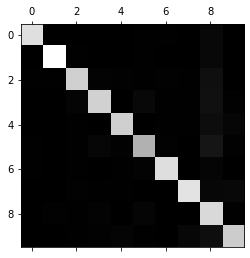

In [98]:
plt.matshow(conf_mx, cmap=plt.cm.gray)

In [99]:
row_sums = conf_mx.sum(axis=1, keepdims=True)

In [100]:
row_sums

array([[5923],
       [6742],
       [5958],
       [6131],
       [5842],
       [5421],
       [5918],
       [6265],
       [5851],
       [5949]], dtype=int64)

In [101]:
norm_conf_mx = conf_mx/row_sums

In [102]:
norm_conf_mx

array([[9.41583657e-01, 0.00000000e+00, 3.71433395e-03, 8.44166807e-04,
        1.35066689e-03, 7.25983454e-03, 6.07800101e-03, 1.01300017e-03,
        3.79875063e-02, 1.68833361e-04],
       [0.00000000e+00, 9.49273213e-01, 5.48798576e-03, 3.55977455e-03,
        5.93295758e-04, 6.52625334e-03, 5.93295758e-04, 1.03826758e-03,
        3.14446752e-02, 1.48323939e-03],
       [4.53172205e-03, 4.53172205e-03, 8.76132931e-01, 1.54414233e-02,
        1.22524337e-02, 4.53172205e-03, 1.12453844e-02, 6.04229607e-03,
        6.34441088e-02, 1.84625713e-03],
       [3.58832164e-03, 2.77279400e-03, 1.90833469e-02, 8.52552602e-01,
        3.26211059e-04, 3.31104224e-02, 4.40384929e-03, 6.52422117e-03,
        6.57315283e-02, 1.19067036e-02],
       [2.05409106e-03, 2.39643958e-03, 7.01814447e-03, 1.54056830e-03,
        8.87024991e-01, 2.05409106e-03, 5.81992468e-03, 4.62170490e-03,
        5.93974666e-02, 2.80725779e-02],
       [4.98063088e-03, 2.76701716e-03, 5.53403431e-03, 3.09905921e-02,
   

fill the diagonal with zeros so that only errors appear in the plot

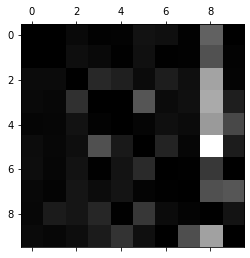

In [104]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

The plot shows that we get false 8s the most, rows atr true labels and columns are p0redicted values.

the classifier gets 3s and 5s confused alot as well.

for false 8s either preprocessing the images or getting bigger training set that containg digits that look like 8s but are not. for 3s and 5s issue we should preprocess to get well centered images.

### Multilabel Classification
when same instance belongs to multiple classes...
creating two classes such as >=7 and odd.....check if image belongs to the clases [>=7, odd]

In [105]:
from sklearn.neighbors import KNeighborsClassifier

In [106]:
y_train_large = (y_train >= 7)

In [107]:
y_train_odd = (y_train%2 == 1)

In [108]:
y_multilabel = np.c_[y_train_large, y_train_odd]

In [109]:
y_multilabel

array([[False,  True],
       [False, False],
       [False, False],
       ...,
       [False,  True],
       [False, False],
       [ True, False]])

In [110]:
knn_clf = KNeighborsClassifier()

In [111]:
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [112]:
knn_clf.predict([some_digit])

array([[False,  True]])

In [113]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)

In [115]:
f1_score(y_multilabel, y_train_knn_pred, average='macro')

0.976410265560605

### Multioutput Classification

multilabel multiclass output.....each label can have multiple classes or values such as 0 to 255 in pixel values.
lets train a model that removes noise from  images. It takes noisy digit images and hopefully outputs clean images.

we will add noise to original images and set original clean images as target for model.

In [116]:
noise = np.random.randint(0, 100, (len(X_train),784))

In [117]:
X_train_mod = X_train + noise 

In [119]:
X_test_mod = X_test + np.random.randint(0, 100, (len(X_test), 784))

In [120]:
y_train_mod , y_test_mod = X_train, X_test

In [121]:
mod_digit = X_train_mod[2].reshape(28, 28)

In [122]:
original_digit = X_train[2].reshape(28,28)

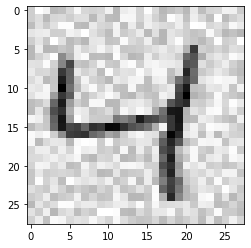

In [123]:
plt.imshow(mod_digit, cmap="binary")

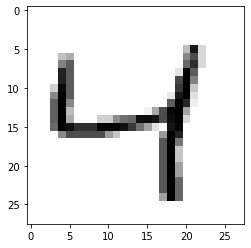

In [124]:
plt.imshow(original_digit, cmap='binary')

In [125]:
knn_clf.fit(X_train_mod, y_train_mod)

KNeighborsClassifier()

In [126]:
clean_digit = knn_clf.predict([X_test_mod[7]])

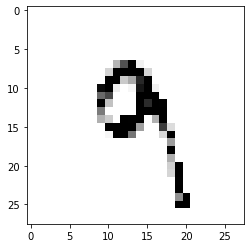

In [128]:
plt.imshow(clean_digit.reshape(28,28), cmap='binary')

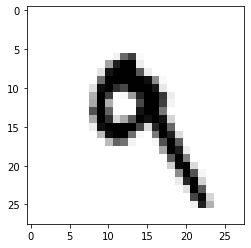

In [130]:
plt.imshow(y_test_mod[7].reshape(28,28),cmap='binary')

looks very similar to original image, that concludes our project!